<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.iteso.mx/documents/27014/202031/Logo-ITESO-MinimoV.png" width="200px" height="100px" />


# Proyecto Módulo 2- Guía.
> En el siguiente proyecto descubriremos si nuestra hipótesis es verdadera, sobre las campañas que hablan acerca del cáncer de pulmón están haciendo efecto, basándonos en 4 nodos específicos que nosotros escogimos en el equipo. Los datos que utilizaremos son sacados de OECD (organisation for Economic Coperation and Development)  para darle valides a nuestro proyecto con una fuente confiable para obtener datos. Con la información obtenida, generaremos simulaciones a los 4 nodos propuestos para verificar si la hipótesis es verdadera y dar solución al problema.    

___
## 1. Entregable.
Los trabajos deben tener los siguientes componentes básicos.

### 1.1 Evolución del cáncer de pulmón.

### 1.2 Objetivos.

> #### 1.1 Objetivo general.
>  Verificar la efectividad de las campañas sobre el cáncer de pulmón.
> #### 1.2 Objetivos específicos
> -  Comprobar que nuestra hipótesis sea verdadera.
> -  Saber si los casos de cáncer de pulmón, gracias a las campañas esta disminuyendo a nivel mundial (por genero y por clase social).
> -  Conocer el ritmo de crecimiento o decrecimiento en los grupos mencionados.


Referencia:
- https://www.cancer.gov/espanol/cancer/naturaleza/estadisticas

### 1.3 Definición del problema.
> El cáncer hoy en día es una de las primeras causas de muerte a nivel mundial; en 2012 se le atribuyeron 8,2 millones de muertes. Los cánceres que causan un mayor número anual de muertes son los de pulmón, hígado, estómago, colon y mama.

>Los tipos más frecuentes de cáncer son diferentes en el hombre y en la mujer., aproximadamente un 30% de las muertes por cáncer se deben a cinco factores de riesgo comportamentales y alimentarios (índice de masa corporal elevado, consumo insuficiente de frutas y verduras, falta de actividad física y consumo de tabaco y alcohol) y, por lo tanto, pueden prevenirse. El cáncer comienza con la transformación de una sola célula, que puede tener su origen en agentes externos y en factores genéticos heredados.

>Con estos datos podemos ver en nuestra hipótesis como se mueve la enfermedad en un caso especifico alrededor del mundo en tanto hombre como a mujeres y en sus diferentes clases sociales.



### 1.4 Nodos y variables que se decidieron simular y porqué

> -	Nodo 1: Hombres primer mundistas.
> -	Nodo 2: Hombres en el resto del mundo.
> -	Nodo 3: Mujeres primer mundistas.
> -	Nodo 4: Mujeres en el resto del mundo.

>La razón por la que escogimos estos nodos fue para encontrar si el cáncer de pulmón  afecta a todas las clases sociales separadas por sexo, y con estos datos poder verificar la hipótesis si los índices de cáncer de pulmón están disminuyendo.


### 1.5 Definición de hipótesis y supuestos.
>  Damos como supuesto debido a la información, publicidad y campaña sobre este tipo de cáncer las tasas deben de ir disminuyendo

### 1.6 Obtención de bases de datos
> El tercer paso del proyecto es indicar de dónde se obtendrán las bases de datos, que indican como se han comportado las variables que identificaste en tu proceso de negocio que vas a simular. En esta investigación debes haber encontrado información propia de la empresa, organización o institución que vas a simular y otra parte de la información debe provenir de investigación que realices en fuentes de información públicas o privadas como las que tiene SECOBI, ahí normalmente y dependiendo del problema elegido, se investigan variables económicas, como tasas de interés, inflación, tipo de cambio, etc., de varios años, por poner un ejemplo.



In [1]:
import numpy as np
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# Importamos pandas
import pandas as pd


## Conociendo nuestros datos

In [2]:
# Cargamos hoja de calculo en un dataframe todos los paises de muestra
ruta = '../DATA/cancerpulmonhym.csv'
datos = pd.read_csv(ruta, index_col=['date'])
datos

,Canadah,Franceh,Irelandh,Mexicoh,UnitedStatesh,Chileh,Canadam,Francem,Irelandm,Mexicom,UnitedStatesm,Chilem
date,,,,,,,,,,,,
2000,NaN,22910,941,NaN,NaN,NaN,NaN,3833,538,NaN,NaN,NaN
2002,12552.0,23044,1001,5622.0,118873.0,NaN,8096.0,4507,598,2633.0,86024.0,NaN
2008,11215.0,24236,1160,6297.0,114691.0,1783.0,10384.0,8194,860,2851.0,100330.0,1070.0
2012,13444.0,28033,1246,5471.0,112054.0,1790.0,12037.0,12010,1027,2968.0,102172.0,1337.0


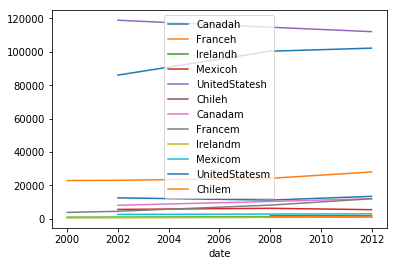

In [3]:

datos.plot()
plt.legend(loc='best')
plt.show()

In [4]:
# Cargamos hoja de calculo en un dataframe datos sobre nivel socioeconomico
ruta2 = '../DATA/primerytercer.csv'
lvlsocio = pd.read_csv(ruta2, index_col=['date'])
lvlsocio

,Primermundistasm,3mundom,Primermundoh,3mundoh
date,,,,
2002,13201,88657,36597,124495
2008,19438,104251,36611,122771
2012,25074,106477,42723,119315


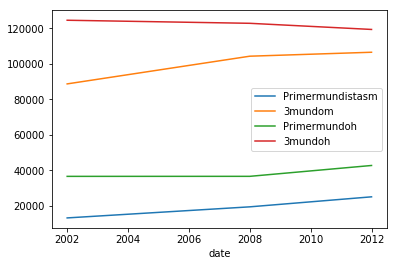

In [5]:
lvlsocio.plot()
plt.show()

## Histograma

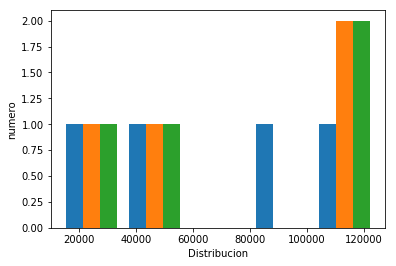

In [6]:
plt.hist(lvlsocio, bins=5)
plt.xlabel("Distribucion")
plt.ylabel("numero")
plt.show()

/Users/manuelsalomon/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/manuelsalomon/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


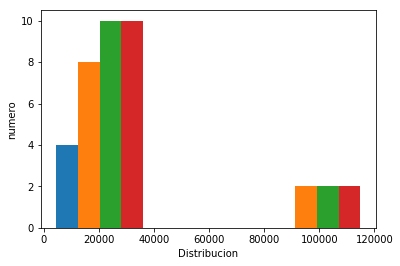

In [7]:
plt.hist(datos, bins=3)
plt.xlabel("Distribucion")
plt.ylabel("numero")
plt.show()

## Primer Mundistas mujeres

In [8]:
primermm = lvlsocio['Primermundistasm']

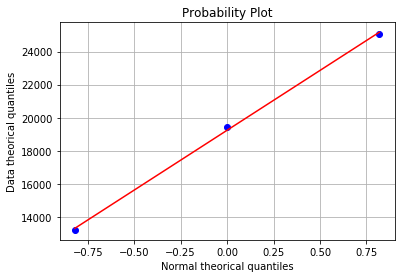

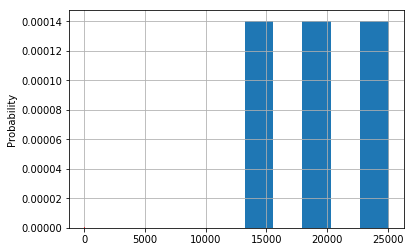

In [9]:
# Datos 1
grap1 = st.probplot(primermm, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

# Histograma de las variables creadas
mu = primermm.mean(); sigma = np.std(primermm)
divisiones = 5 # Cantidad de barras en el histograma
plt.hist(primermm,divisiones,density=True)
x = np.arange(8,32,.1)
y = st.norm.pdf(x,loc = mu, scale = sigma)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

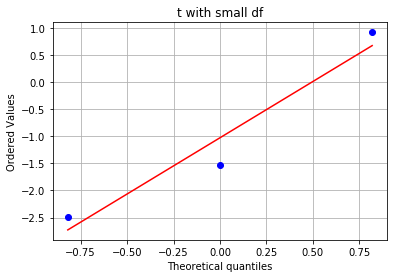

In [10]:
#A t distribution with small degrees of freedom:
x = st.t.rvs(primermm)
res = st.probplot(x, plot=plt)
plt.title('t with small df')
plt.grid()
plt.show()

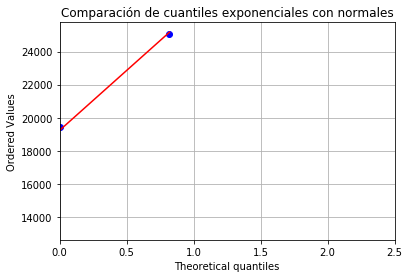

In [11]:
x = st.expon.rvs(primermm)
res = st.probplot(x, plot=plt, dist='norm')
plt.title('Comparación de cuantiles exponenciales con normales')
plt.xlim([0,2.5])
plt.grid()
plt.show()

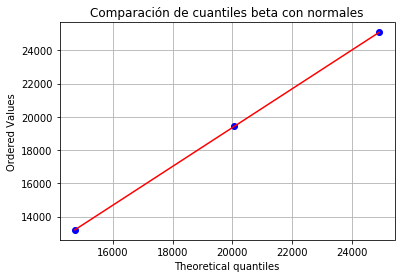

In [12]:
param = st.beta.fit(primermm)
a = param[0]
b = param[1]
m = param[2]
d = param[3]
res = st.probplot(primermm, sparams=(a,b,m,d),plot=plt, dist='beta')
plt.title('Comparación de cuantiles beta con normales')
plt.grid()
plt.show()

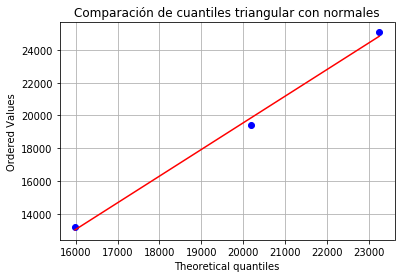

In [13]:
param = st.triang.fit(primermm)
a = param[0]
l = param[1]
s = param[2]
res = st.probplot(primermm, sparams=(a,l,s),plot=plt, dist='triang')
plt.title('Comparación de cuantiles triangular con normales')
plt.grid()
plt.show()

/Users/manuelsalomon/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


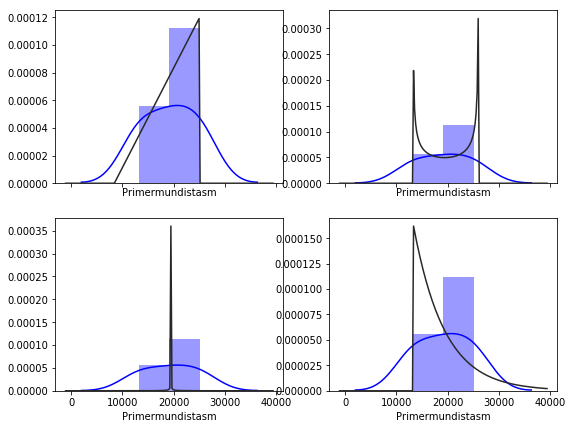

In [14]:
f, axes = plt.subplots(2, 2, figsize=(9, 7), sharex=True)
sns.distplot(lvlsocio.loc[:,'Primermundistasm'], color="b", fit=stats.triang, norm_hist=True,ax=axes[0, 0])
sns.distplot(lvlsocio.loc[:,'Primermundistasm'], color="b", fit=stats.beta, norm_hist=True,ax=axes[0, 1])
sns.distplot(lvlsocio.loc[:,'Primermundistasm'], color="b", fit=stats.t, norm_hist=True,ax=axes[1, 0])
sns.distplot(lvlsocio.loc[:,'Primermundistasm'], color="b", fit=stats.expon, norm_hist=True,ax=axes[1, 1])

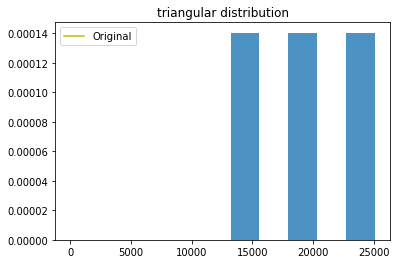

In [15]:
# Método de máxima verosimilitud
np.random.seed(5555)
################ Adjusting a exponential distribution 
# picking 150 of from a exponential distrubution
# with lambda = 5
samp = primermm
param = st.triang.fit(samp)
x = np.linspace(0,60,1)
pdf = st.triang.pdf(x,c=param[0],loc=param[1],scale=param[2])
plt.title('triangular distribution')
plt.plot(x,pdf,'y-',label='Original')
plt.legend()
plt.hist(primermm,5,density=True,alpha=.8)
plt.show()

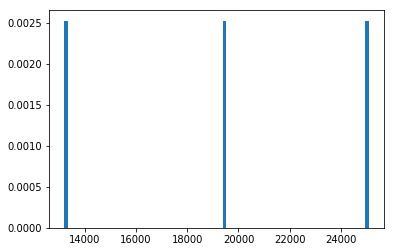

media mu =19071.538889, desviación estándar muestral =3427.228296


In [16]:
#Prueba chi cuadrada
mu_real = primermm.mean(); sigma_real = np.std(primermm)
N = len(primermm) # Cantidad de muestras
n1 = np.random.normal(mu_real,sigma_real,N)
J = 90  # Cantidad de particiones del histograma
[freq,x,p]=plt.hist(primermm,J,density=True)
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Media y desviación estándar muestral
mu = np.mean(x)
sigma = np.std(x)
print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))

In [17]:
pi = st.triang.pdf(x,c=param[0],loc=param[1],scale=param[2])
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei,obs_i:(obs_i-Ei)**2/Ei,Ei,freq)))
print('Valor de chi cuadrado teorico  = ',x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)

# Cálculo de Grados de libertad del estadístico
p = 4 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Media muestral = ',mu,'\nDesviación estándar muestral = ',sigma)

Valor de chi cuadrado teorico  =  139.4173216908692
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=139.4173216908692, pvalue=0.0005119744799555676)
Estadístico de chi_cuadrado =  107.52174097071946
Media muestral =  19071.53888888889 
Desviación estándar muestral =  3427.228296151327


## Tercer mundista mujeres

In [18]:
tercermm = lvlsocio['3mundom']

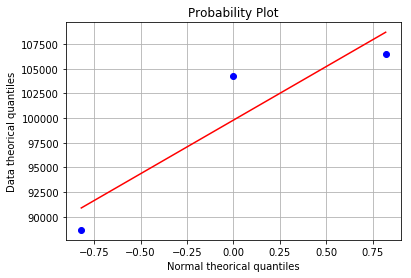

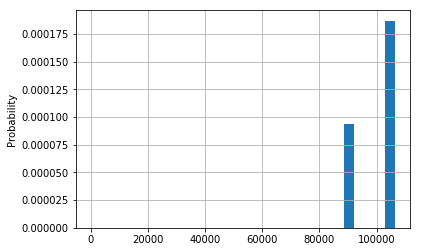

In [19]:
# Datos 1
grap1 = st.probplot(tercermm, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

# Histograma de las variables creadas
mu = tercermm.mean(); sigma = np.std(tercermm)
divisiones = 5 # Cantidad de barras en el histograma
plt.hist(tercermm,divisiones,density=True)
x = np.arange(8,32,.1)
y = st.norm.pdf(x,loc = mu, scale = sigma)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

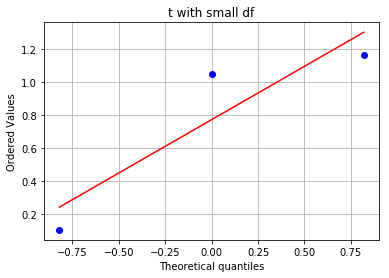

In [20]:
#A t distribution with small degrees of freedom:
x = st.t.rvs(tercermm)
res = st.probplot(x, plot=plt)
plt.title('t with small df')
plt.grid()
plt.show()

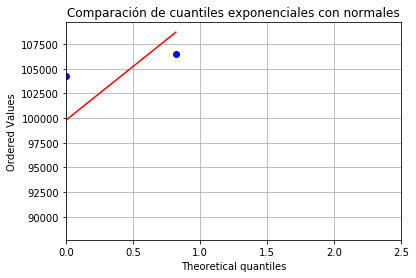

In [21]:
x = st.expon.rvs(tercermm)
res = st.probplot(x, plot=plt, dist='norm')
plt.title('Comparación de cuantiles exponenciales con normales')
plt.xlim([0,2.5])
plt.grid()
plt.show()

/Users/manuelsalomon/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/manuelsalomon/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


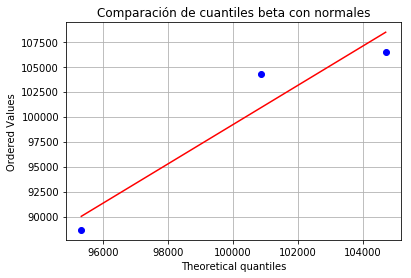

In [22]:
param = st.beta.fit(tercermm)
a = param[0]
b = param[1]
m = param[2]
d = param[3]
res = st.probplot(tercermm, sparams=(a,b,m,d),plot=plt, dist='beta')
plt.title('Comparación de cuantiles beta con normales')
plt.grid()
plt.show()

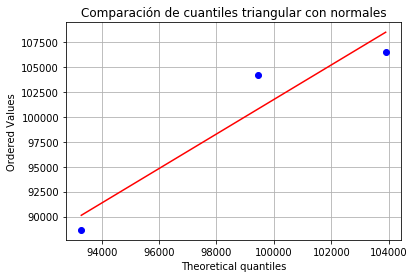

In [23]:
param = st.triang.fit(tercermm)
a = param[0]
l = param[1]
s = param[2]
res = st.probplot(tercermm, sparams=(a,l,s),plot=plt, dist='triang')
plt.title('Comparación de cuantiles triangular con normales')
plt.grid()
plt.show()

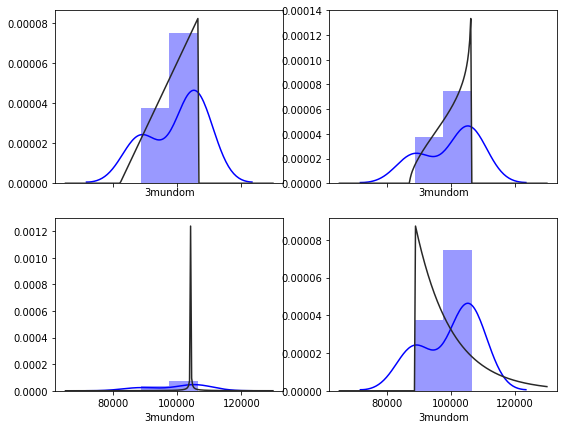

In [24]:
f, axes = plt.subplots(2, 2, figsize=(9, 7), sharex=True)
sns.distplot(lvlsocio.loc[:,'3mundom'], color="b", fit=stats.triang, norm_hist=True,ax=axes[0, 0])
sns.distplot(lvlsocio.loc[:,'3mundom'], color="b", fit=stats.beta, norm_hist=True,ax=axes[0, 1])
sns.distplot(lvlsocio.loc[:,'3mundom'], color="b", fit=stats.t, norm_hist=True,ax=axes[1, 0])
sns.distplot(lvlsocio.loc[:,'3mundom'], color="b", fit=stats.expon, norm_hist=True,ax=axes[1, 1])

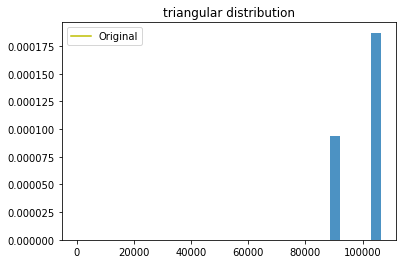

In [25]:
# Método de máxima verosimilitud
np.random.seed(5555)
################ Adjusting a exponential distribution 
# picking 150 of from a exponential distrubution
# with lambda = 5
samp = tercermm
param = st.beta.fit(samp)
x = np.linspace(0,60,1)
pdf = st.beta.pdf(x,a=param[0],b=param[1],loc=param[2],scale=param[3])
plt.title('triangular distribution')
plt.plot(x,pdf,'y-',label='Original')
plt.legend()
plt.hist(tercermm,5,density=True,alpha=.8)
plt.show()

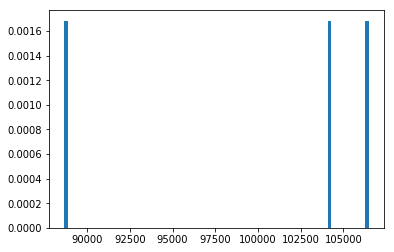

media mu =97468.000000, desviación estándar muestral =5143.873346


In [26]:
#Prueba chi cuadrada
mu_real = tercermm.mean(); sigma_real = np.std(tercermm)
N = len(tercermm) # Cantidad de muestras
n1 = np.random.normal(mu_real,sigma_real,N)
J = 90  # Cantidad de particiones del histograma
[freq,x,p]=plt.hist(tercermm,J,density=True)
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Media y desviación estándar muestral
mu = np.mean(x)
sigma = np.std(x)
print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))

In [27]:
pi = st.beta.pdf(x,a=param[0],b=param[1],loc=param[2],scale=param[3])
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei,obs_i:(obs_i-Ei)**2/Ei,Ei,freq)))
print('Valor de chi cuadrado teorico  = ',x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Media muestral = ',mu,'\nDesviación estándar muestral = ',sigma)

Valor de chi cuadrado teorico  =  488.3548925250236
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=488.3548925250236, pvalue=2.0108433573365717e-56)
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  97468.0 
Desviación estándar muestral =  5143.873346030207


## Primer mundista hombres

In [28]:
primermh = lvlsocio['Primermundoh']

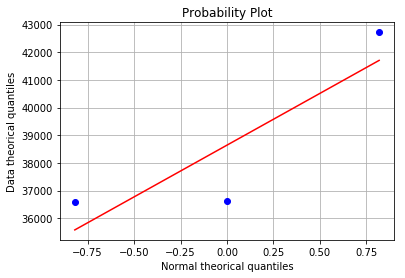

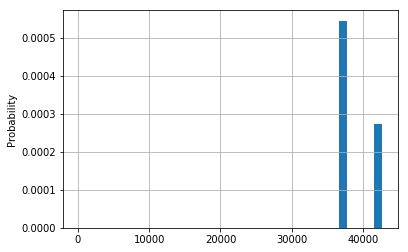

In [29]:
# Datos 1
grap1 = st.probplot(primermh, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

# Histograma de las variables creadas
mu = primermh.mean(); sigma = np.std(primermh)
divisiones = 5 # Cantidad de barras en el histograma
plt.hist(primermh,divisiones,density=True)
x = np.arange(8,32,.1)
y = st.norm.pdf(x,loc = mu, scale = sigma)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

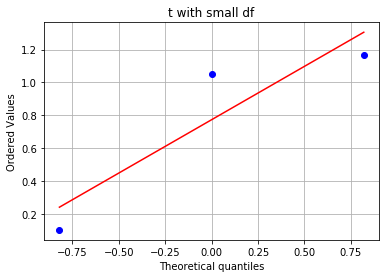

In [30]:
#A t distribution with small degrees of freedom:
x = st.t.rvs(primermh)
res = st.probplot(x, plot=plt)
plt.title('t with small df')
plt.grid()
plt.show()

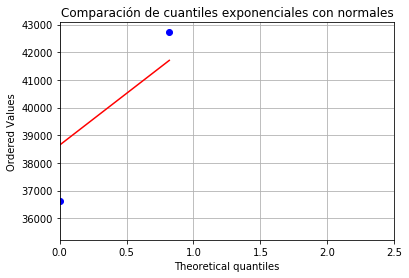

In [31]:
x = st.expon.rvs(primermh)
res = st.probplot(x, plot=plt, dist='norm')
plt.title('Comparación de cuantiles exponenciales con normales')
plt.xlim([0,2.5])
plt.grid()
plt.show()

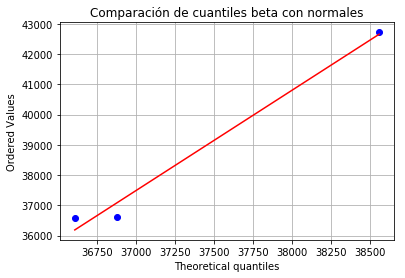

In [32]:
param = st.beta.fit(primermh)
a = param[0]
b = param[1]
m = param[2]
d = param[3]
res = st.probplot(primermh, sparams=(a,b,m,d),plot=plt, dist='beta')
plt.title('Comparación de cuantiles beta con normales')
plt.grid()
plt.show()

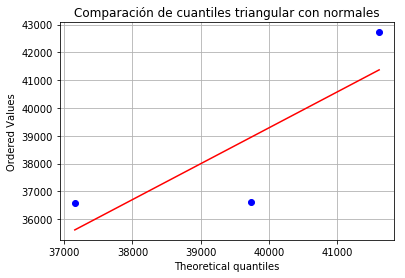

In [33]:
param = st.triang.fit(primermh)
a = param[0]
l = param[1]
s = param[2]
res = st.probplot(primermh, sparams=(a,l,s),plot=plt, dist='triang')
plt.title('Comparación de cuantiles triangular con normales')
plt.grid()
plt.show()

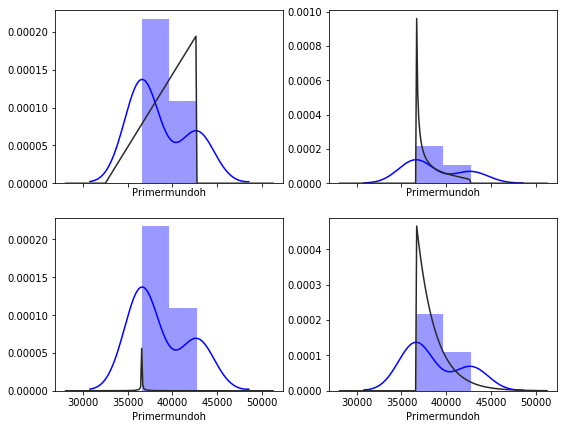

In [34]:
f, axes = plt.subplots(2, 2, figsize=(9, 7), sharex=True)
sns.distplot(lvlsocio.loc[:,'Primermundoh'], color="b", fit=stats.triang, norm_hist=True,ax=axes[0, 0])
sns.distplot(lvlsocio.loc[:,'Primermundoh'], color="b", fit=stats.beta, norm_hist=True,ax=axes[0, 1])
sns.distplot(lvlsocio.loc[:,'Primermundoh'], color="b", fit=stats.t, norm_hist=True,ax=axes[1, 0])
sns.distplot(lvlsocio.loc[:,'Primermundoh'], color="b", fit=stats.expon, norm_hist=True,ax=axes[1, 1])

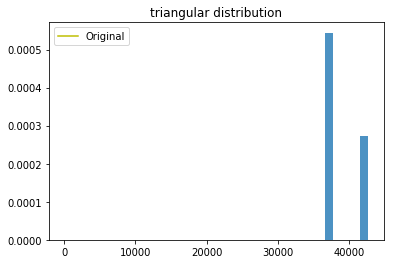

In [35]:
# Método de máxima verosimilitud
np.random.seed(5555)
################ Adjusting a exponential distribution 
# picking 150 of from a exponential distrubution
# with lambda = 5
samp = primermh
param = st.expon.fit(samp)
x = np.linspace(0,60,1)
pdf = st.expon.pdf(x,loc=param[0],scale=param[1])
plt.title('triangular distribution')
plt.plot(x,pdf,'y-',label='Original')
plt.legend()
plt.hist(primermh,5,density=True,alpha=.8)
plt.show()

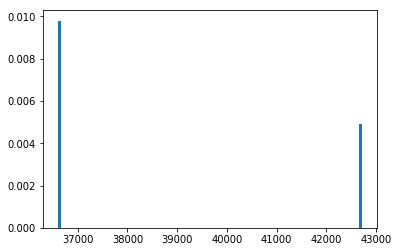

media mu =39625.966667, desviación estándar muestral =1768.314709


In [36]:
#Prueba chi cuadrada
mu_real = primermh.mean(); sigma_real = np.std(primermh)
N = len(primermh) # Cantidad de muestras
n1 = np.random.normal(mu_real,sigma_real,N)
J = 90  # Cantidad de particiones del histograma
[freq,x,p]=plt.hist(primermh,J,density=True)
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Media y desviación estándar muestral
mu = np.mean(x)
sigma = np.std(x)
print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))

In [37]:
pi = st.expon.pdf(x,loc=param[0],scale=param[1])
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei,obs_i:(obs_i-Ei)**2/Ei,Ei,freq)))
print('Valor de chi cuadrado teorico  = ',x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Media muestral = ',mu,'\nDesviación estándar muestral = ',sigma)

Valor de chi cuadrado teorico  =  543.1933675230997
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=543.1933675230997, pvalue=2.4921839066958767e-66)
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  39625.96666666667 
Desviación estándar muestral =  1768.3147091908554


## Tercer mundista hombres

In [38]:
tercermh = lvlsocio['3mundoh']

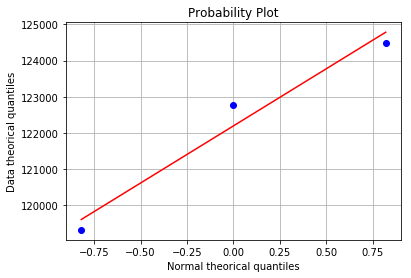

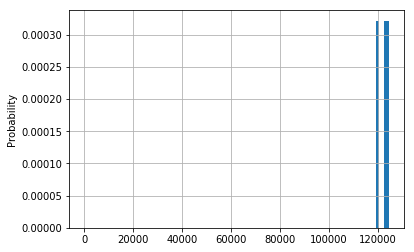

In [39]:
# Datos 1
grap1 = st.probplot(tercermh, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

# Histograma de las variables creadas
mu = tercermh.mean(); sigma = np.std(tercermh)
divisiones = 5 # Cantidad de barras en el histograma
plt.hist(tercermh,divisiones,density=True)
x = np.arange(8,32,.1)
y = st.norm.pdf(x,loc = mu, scale = sigma)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

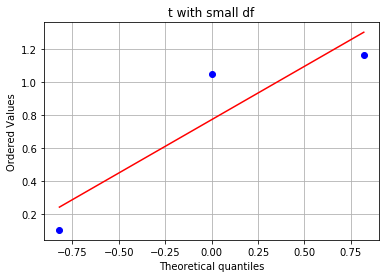

In [40]:
#A t distribution with small degrees of freedom:
x = st.t.rvs(tercermh)
res = st.probplot(x, plot=plt)
plt.title('t with small df')
plt.grid()
plt.show()

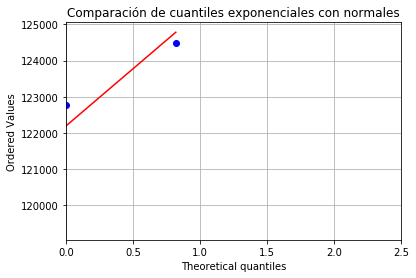

In [41]:
x = st.expon.rvs(tercermh)
res = st.probplot(x, plot=plt, dist='norm')
plt.title('Comparación de cuantiles exponenciales con normales')
plt.xlim([0,2.5])
plt.grid()
plt.show()

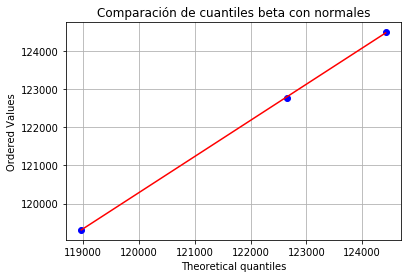

In [42]:
param = st.beta.fit(tercermh)
a = param[0]
b = param[1]
m = param[2]
d = param[3]
res = st.probplot(tercermh, sparams=(a,b,m,d),plot=plt, dist='beta')
plt.title('Comparación de cuantiles beta con normales')
plt.grid()
plt.show()

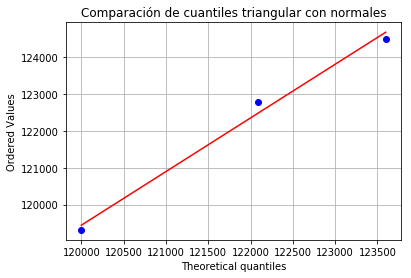

In [43]:
param = st.triang.fit(tercermh)
a = param[0]
l = param[1]
s = param[2]
res = st.probplot(tercermh, sparams=(a,l,s),plot=plt, dist='triang')
plt.title('Comparación de cuantiles triangular con normales')
plt.grid()
plt.show()

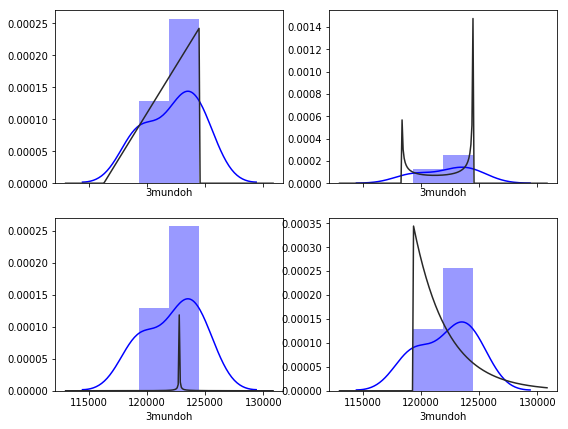

In [44]:
f, axes = plt.subplots(2, 2, figsize=(9, 7), sharex=True)
sns.distplot(lvlsocio.loc[:,'3mundoh'], color="b", fit=stats.triang, norm_hist=True,ax=axes[0, 0])
sns.distplot(lvlsocio.loc[:,'3mundoh'], color="b", fit=stats.beta, norm_hist=True,ax=axes[0, 1])
sns.distplot(lvlsocio.loc[:,'3mundoh'], color="b", fit=stats.t, norm_hist=True,ax=axes[1, 0])
sns.distplot(lvlsocio.loc[:,'3mundoh'], color="b", fit=stats.expon, norm_hist=True,ax=axes[1, 1])

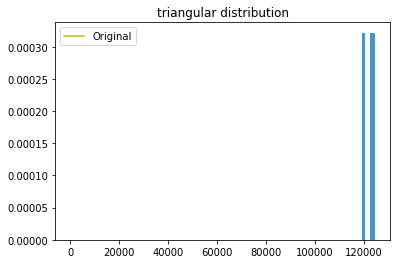

In [45]:
# Método de máxima verosimilitud
np.random.seed(5555)
################ Adjusting a exponential distribution 
# picking 150 of from a exponential distrubution
# with lambda = 5
samp = tercermh
param = st.triang.fit(samp)
x = np.linspace(0,60,1)
pdf = st.triang.pdf(x,c=param[0],loc=param[1],scale=param[2])
plt.title('triangular distribution')
plt.plot(x,pdf,'y-',label='Original')
plt.legend()
plt.hist(tercermh,5,density=True,alpha=.8)
plt.show()

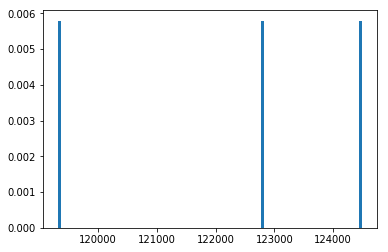

media mu =121876.222222, desviación estándar muestral =1495.244890


In [46]:
#Prueba chi cuadrada
mu_real = tercermh.mean(); sigma_real = np.std(tercermh)
N = len(tercermh) # Cantidad de muestras
n1 = np.random.normal(mu_real,sigma_real,N)
J = 90  # Cantidad de particiones del histograma
[freq,x,p]=plt.hist(tercermh,J,density=True)
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Media y desviación estándar muestral
mu = np.mean(x)
sigma = np.std(x)
print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))

In [47]:
pi = st.triang.pdf(x,c=param[0],loc=param[1],scale=param[2])
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei,obs_i:(obs_i-Ei)**2/Ei,Ei,freq)))
print('Valor de chi cuadrado teorico  = ',x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Media muestral = ',mu,'\nDesviación estándar muestral = ',sigma)

Valor de chi cuadrado teorico  =  1822.640812466376
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=1822.640812466376, pvalue=0.0)
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  121876.2222222222 
Desviación estándar muestral =  1495.2448895867828


## Inicio de simulación

### Nodo 1

In [49]:
param = st.triang.fit(primermm)
a = param[0]
l = param[1]
s = param[2]
N = np.random.triangular(a,l,s)


12060.535684266886

### 1.7 Visualización de resultados de simulación.
> Se deben simular al menos 4  "nodos" o "escenarios" en tu problema. Para la segunda entrega debes haber elaborado un programa que simule dos de ellos, los primeros dos de tu diagrama.
> Para la entrega final deben de tener los 4 nodos con todas sus simulaciones.

### 1.6 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 1.7 Referencias.
> Citar (en formato APA) la bibliografía utilizada.

___
## 2. Especificaciones adicionales.
En el grupo deben haber mínimo dos integrantes y máximo tres integrantes. Para propósitos logísticos nada más, por favor enumérense como *integrante 1*, *integrante 2* e *integrante 3*.

### 2.1 Notebook de jupyter. 
> Los anteriores numerales los deben desarrollar todos en un notebook de jupyter y llamarlo de la siguiente manera `ProyectoModulo1_ApellidoN1_ApellidoN2_ApellidoN3`, donde `ApellidoNi` hace referencia al apellido materno y la inicial del primer nombre del integrante `i`.

### 2.2 Proyecto en `GitHub`.
> El integrante 1 deberá crear un proyecto en `GitHub` llamado **proyecto_modulo1**, donde tendrán todos los archivos relacionados con el proyecto. Los demás integrantes deben hacer un *fork* del proyecto, seguir el proyecto principal con `GitKraken` y hacer al menos dos contribuciones con *pull request* (como se hizo en la tarea). En el proyecto, deben incluir el repositorio remoto del integrante 1.

### 2.3 Presentación.
> Recuerden que la nota del proyecto es mitad el trabajo, y mitad la presentación. Deben hacer una presentación ya sea en power point o utlizando un notebook de python para presentar el trabajo durante un horario de clase que se será posteriomente definido. La presentación, además de llevar todos los componentes básicos descritos en el entregable, debe llevar una tabla de contenido.
> - Presentación: 10 minutos.
> - Seguir estas recomendaciones: https://es.slideshare.net/MeireComputacion/power-point-pautas-para-una-buen-trabajo

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>